In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

In [ ]:
import seaborn as sns
sns.set(font_scale=1)

red   = '#FF3300'
blue  = '#0099CC'
green = '#00CC66'

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
data = pd.read_csv("/content/NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
data.describe()

,release year,user rating score
count,1000.000000,605.000000
mean,2010.335000,84.094215
std,8.877927,12.344371
min,1940.000000,55.000000
25%,2007.000000,75.000000
50%,2015.000000,88.000000
75%,2016.000000,95.000000
max,2017.000000,99.000000


### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
print('Количество дубликатов с учётом всех признаков: ', len(data[data.duplicated()]))
print('Количество дубликатов по названию: ', len(data[data['title'].duplicated()]))

Количество дупликатов с учётом всех признаков:  500
Количество дупликатов по названию:  504


Так как датасет представляет из себя 1000 шоу, то есть, набор данных состоящий исключительно из уникальных значений по названиям шоу, то следует искать дубликаты именно по 'title'.

Как мы видим, поиск дубликатов с учётом всех признаков дал результат меньше, чем только по названию. Это говорит нам о том, что какие-то 4-ре объекта имеют одинаковое значение признака 'title', но в каком-то другом имеют разное значение, что по сути недопустимо, ведь не может  в таком датасете один и тот же фильм иметь, например, разные рейтинги, или разную дату премьеры.

Докажем это:

In [ ]:
data[data['title'].duplicated()] \
.merge(data[data.duplicated()], how='left', indicator=True) \
.query("_merge == 'left_only'").drop(columns='_merge')

,title,rating,ratingLevel,release year,user rating score
143,Skins,TV-MA,NaN,2017,NaN
578,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
705,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0
771,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0


Проверим полученные названия на исходном датасете

In [ ]:
data[data['title'].isin(['Skins', 'Bordertown','Star Wars: The Clone Wars', 'Goosebumps'])] \
.sort_values(by='title')

,title,rating,ratingLevel,release year,user rating score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
225,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
671,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
151,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
181,Skins,TV-MA,NaN,2017,NaN
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


Как мы и предполагали, есть дубликаты, где один и тот же фильм имеет разные даты премьеры, рейтинги или оценки пользователей. К счастью для нас, 4 таких дубликата удачно выбрались кодом выше, поскольку в сравнении было видно, что именно эти дубликаты менее правдоподбные и менее информативные

Теперь попробуем выяснить, почему половина всех значений датасета - дубликаты

In [ ]:
# возьмём первые 10 самых встречаемых дубликатов по названию фильма
# может быть будет наглядно видна причина дублирования

mask = data[data.duplicated()].groupby('title').size() \
.sort_values(ascending=False)[:10].index

data[data['title'].isin(mask)].sort_values(by='title')

,title,rating,ratingLevel,release year,user rating score
347,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
295,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
396,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
497,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
...,...,...,...,...,...
69,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,2016,97.0
280,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,2016,97.0
330,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,2016,97.0
367,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,2016,97.0


In [ ]:
# Не помогло, теперь проверим на пропуски
# в 174 дубликатах есть пропуски

mask = data[data['title'].duplicated()]
mask[mask.isna().any(1)] 

,title,rating,ratingLevel,release year,user rating score
50,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
77,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
93,Girlboss,TV-MA,NaN,2017,94.0
95,Sand Castle,TV-MA,NaN,2017,89.0
96,Sandy Wexler,TV-14,NaN,2017,92.0
...,...,...,...,...,...
983,Beverly Hills Chihuahua 3: Viva La Fiesta!,G,General Audiences. Suitable for all ages.,2012,NaN
990,My Animal Friends,TV-Y,Suitable for all ages.,2013,NaN
992,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN


Сложно ответить на вопрос, что послужило причиной такого количества дубликатов, но можно заметить, что они состоят примерно на одну третью из пропущенных значений. Можно предположить, что когда специалисты Netflix делали выгрузку из баз данных, при использовании левого или правого соединения получились пропущенные значения в некоторых признаках, и, возможно, они допустили ошибку в sql-запросе, например "перемножив" записи в подзапросах.

Дубликаты составляют чуть больше половины датасета. Это очень много, половина датасета неинформативна.

In [ ]:
# топ 10 самых дублируемых групп

data[data['title'].duplicated()]['ratingLevel'].value_counts()[:10]

Parents strongly cautioned. May be unsuitable for children ages 14 and under.    124
General Audiences. Suitable for all ages.                                         82
Suitable for all ages.                                                            55
For mature audiences.  May not be suitable for children 17 and under.             51
Parental guidance suggested. May not be suitable for all children.                24
Suitable for children ages 7 and older.  Content contains fantasy violence.       19
Suitable for children ages 7 and older                                            15
Parental guidance suggested. May not be suitable for children.                     9
for action and some rude humor                                                     5
fantasy action and mild language                                                   5
Name: ratingLevel, dtype: int64

Если переводить, то понятно почему эти группы самые частые. Вторая и третья строчки (далее группы) подходят для всех. Первая группа для людей от 14 лет, но это условие, скорей всего, не сильно режет количество пользователей. То, что данная группа оказалась в лидерах, вероятно это просто совпадение каких-то факторов, когда распределяли фильмы по категориям.

In [ ]:
# Теперь можем удалить дубликаты

data.drop_duplicates('title', inplace=True)

### Сколько рейтинговых групп представлено в данных?

In [ ]:
# Группы

data['rating'].nunique()

13

In [ ]:
# Подгруппы

# Примечание: до удаления дубликатов было 99 групп, значит, какой то фильм имел две группы

data['ratingLevel'].nunique()

98

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

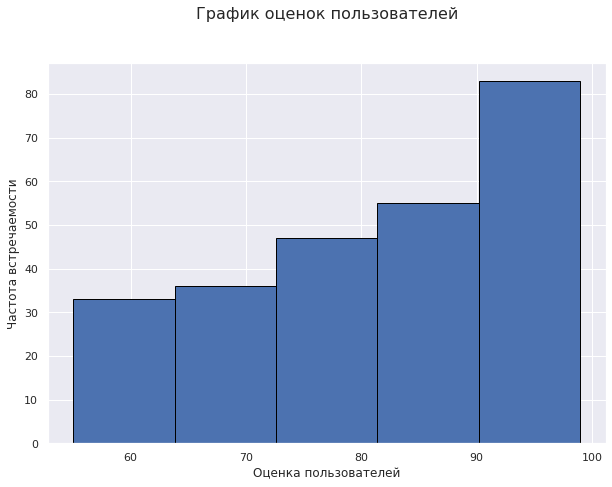

In [ ]:
fig, ax = plt.subplots()

plt.hist(data['user rating score'], edgecolor='black', bins=5)

ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Частота встречаемости')
ax.set_title('График оценок пользователей', y=1.1, fontdict={'fontsize': 16})

fig.set_size_inches(10, 7)

plt.show()

Если переводить 100-балльную систему в 5-балльную, то на графике заметно, что пользователи чаще оценивают фильмы на отлично (диапазон 80-100)

In [ ]:
# Посмотрим какие рейтинги чаще встречаются в диапазоне по 5-бальной шкале

data['score_range'] = pd.qcut(data['user rating score'], q=[0, .06917, .4, 1])
data.groupby(['rating'])['score_range'].value_counts().unstack()

,"(54.999, 60.0]","(60.0, 80.0]","(80.0, 99.0]"
rating,,,
G,4,9,6
NR,1,0,1
PG,2,14,31
PG-13,1,5,3
R,0,4,3
TV-14,3,27,47
TV-G,1,5,5
TV-MA,3,8,29
TV-PG,2,3,15


Как мы видим рейтинги PG и TV-14 сильно выделяются в диапазоне 80-99 и они также выделяются в не интересующем нас диапазоне 60-80. А вот рейтинги TV-MA и TV-PG выделяются пускай и меньше, но они выделяются только в диапазоне 80-99. Посмотрим какие группы входят во все 4 рейтинга

In [ ]:
data[data['rating'].isin(['PG', 'TV-14', 'TV-MA', 'TV-PG'])] \
[['rating', 'ratingLevel']].drop_duplicates().dropna()

,rating,ratingLevel
2,TV-14,Parents strongly cautioned. May be unsuitable ...
4,TV-PG,Parental guidance suggested. May not be suitab...
6,TV-MA,For mature audiences. May not be suitable for...
86,PG,"some thematic elements, rude humor and action"
88,PG,mild thematic elements
...,...,...
976,PG,"some mild, rude humor"
977,PG,brief mild language and some rude behavior
978,PG,some reckless behavior
981,PG,some mild thematic elements


In [ ]:
# Теперь посмотрим на другие рейтинговые группы, которых меньше

data[~data['rating'].isin(['PG', 'TV-14', 'TV-MA', 'TV-PG'])] \
[['rating', 'ratingLevel']].drop_duplicates().dropna()

,rating,ratingLevel
0,PG-13,"crude and sexual humor, language and some drug..."
1,R,"strong violence, sexual content and adult lang..."
14,R,language and brief violence
15,TV-Y,Suitable for all ages.
19,NR,This movie has not been rated.
33,TV-Y7-FV,Suitable for children ages 7 and older. Conte...
35,R,"bloody war violence, language throughout and s..."
38,UR,This movie has not been rated. Intended for ad...
87,R,"pervasive language, some sexual material, viol..."
90,R,"strong crude sexual content, pervasive languag..."


Какое-то странное распределение по группам, практически все ± об одном и том же. Зачастую это взрослый контент и он присутсвует как в рейтингах, которые самые распространённые среди высоких оценок, так и среди тех, которые распространены меньше. Исходя из имеющихся данных, сложно сказать почему именно такие оценки люди ставят фильмам.

In [ ]:
data.drop(columns='score_range', inplace=True)

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data['user rating score'].agg(['mean', 'median', 'std', 'min', 'max'])

mean      81.318898
median    83.000000
std       12.748583
min       55.000000
max       99.000000
Name: user rating score, dtype: float64

Медиана и среднее отличаются, но не сильно.

Данные характеристики могут отличаться при выбросах. Например, если бы у нас было даже одно, но очень экстремальное значение, нулей которого не счесть, то это бы сильно повлияло на среднее, но почти никак бы не сказалось на медиане.

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
data['release year'].unique()

array([2004, 2006, 2016, 2008, 2014, 2013, 2017, 2015, 2011, 2009, 2007,
       2012, 2003, 2001, 2010, 1998, 1999, 1978, 2005, 1993, 2002, 1976,
       1989, 1996, 1997, 2000, 1994, 1982, 1990, 1940, 1986, 1995, 1991,
       1992, 1987])

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

In [ ]:
shows_per_year = data.groupby('release year')['title'].size()

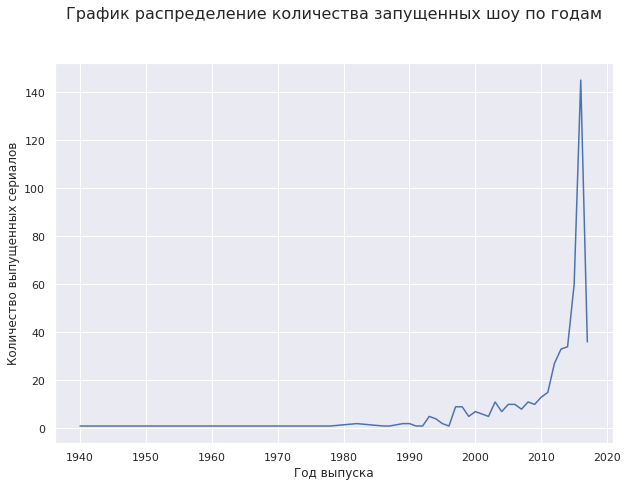

In [ ]:
fig, ax = plt.subplots()

plt.plot(shows_per_year)

ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество выпущенных сериалов')
ax.set_title('График распределение количества запущенных шоу по годам', y=1.1, 
             fontdict={'fontsize': 16})

fig.set_size_inches(10, 7)

plt.show()

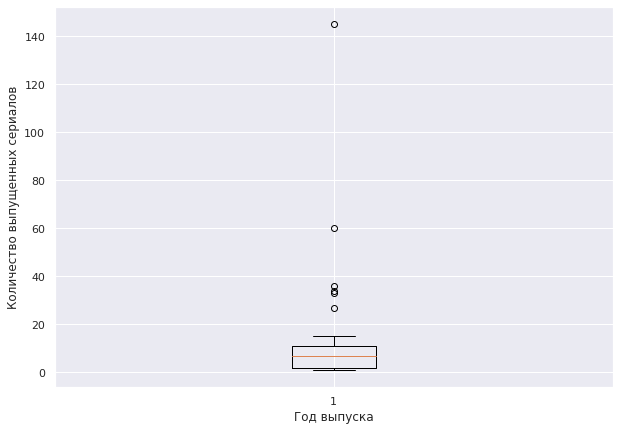

In [ ]:
fig, ax = plt.subplots()

plt.boxplot(shows_per_year)

ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество выпущенных сериалов')

fig.set_size_inches(10, 7)

plt.show()

Boxplot показывает что есть выбросы. Проверим, так ли это на самом деле

In [ ]:
# Посмотрим на старые года, где за точку отсчёта взята дата основания Netflix,
# как раз там ± начинается рост выпуска сериалов за год

data[data['release year'] < 1997] 

,title,rating,ratingLevel,release year,user rating score
252,Grease,PG,Parental guidance suggested. May not be suitab...,1978,86.0
500,The Nightmare Before Christmas,PG,some scary images,1993,84.0
506,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
507,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
519,The Super Mario Bros. Super Show!,TV-Y7,Suitable for children ages 7 and older,1989,NaN
520,Power Rangers Zeo,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,1996,NaN
600,The Little Rascals,PG,some rude dialogue,1994,86.0
658,Annie,PG,adult content and mld violence,1982,68.0
700,Cool Runnings,PG,Parental guidance suggested. May not be suitab...,1993,81.0
701,Homeward Bound: The Incredible Journey,G,General Audiences. Suitable for all ages.,1993,96.0


Вроде как реальные фильмы, без вбросов.

Как было видно на графике распределения, примерно с даты основания Netflix в 1997 году, наблюдался плавный рост новых сериалов за год, потом большой шип вверх и резко вниз. Давайте посмотрим за какой год наблюдалась такая активность

In [ ]:
shows_per_year.sort_index(ascending=False)[:21]

release year
2017     36
2016    145
2015     60
2014     34
2013     33
2012     27
2011     15
2010     13
2009     10
2008     11
2007      8
2006     10
2005     10
2004      7
2003     11
2002      5
2001      6
2000      7
1999      5
1998      9
1997      9
Name: title, dtype: int64

Как-то слабо верится, что такой шип являлся всплеском деловой активности в киноиндустрии, а потом резким её спадом. Построим boxplot снова, но уже возьмём даты от основания Netflix

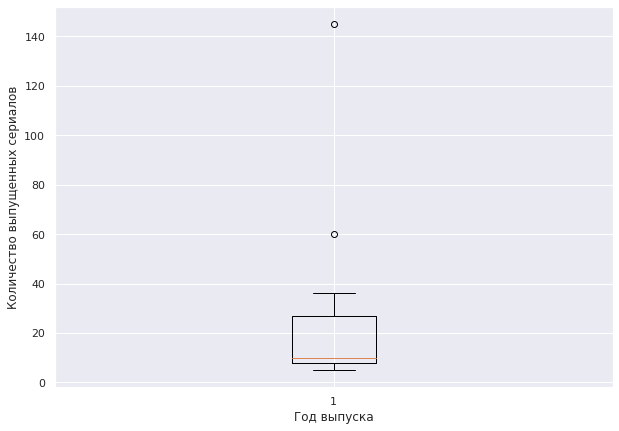

In [ ]:
fig, ax = plt.subplots()

plt.boxplot(shows_per_year[shows_per_year.index >= 1997])

ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество выпущенных сериалов')

fig.set_size_inches(10, 7)

plt.show()

Теперь картина выглядит реалистичней. Есть ещё выброс со значением = 60, но это уже решение требующее творческий подход, оставлять его или нет. Такая цифра похожа на всплеск деловой активности.

Как мы могли наблюдать, выброс это экстремальное значение, которое выбивается из общего распределения. Оно или сильно маленькое, или сильно большое.

Выбросы возникают по многим причинам, таким как: опечатки при заполнении данных; неправильно составленным sql-запросе; ошибки в измерениях; разность природы данных (как в нашем примере, где в прошлом столетии было нормой одна частота выпусков фильмов, а в нынешнем столетии уже другая)

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



In [ ]:
data.groupby('release year')['user rating score'].mean()[-2:]

release year
2016    84.313953
2017    88.125000
Name: user rating score, dtype: float64

На первый взгляд, 2017 год успешней, но давайте сделаем несколько уточнений

In [ ]:
data[data['release year']== 2016]['user rating score']. \
value_counts(dropna=False, normalize=True).head(5)

NaN     0.406897
97.0    0.055172
98.0    0.041379
95.0    0.041379
96.0    0.041379
Name: user rating score, dtype: float64

In [ ]:
data[data['release year']== 2017]['user rating score']. \
value_counts(dropna=False, normalize=True).head(5)

NaN     0.555556
94.0    0.055556
91.0    0.027778
98.0    0.027778
82.0    0.027778
Name: user rating score, dtype: float64

За каждый год имеются ± половина пропусков в оценках пользователей. Учитывая то, что мы знаем что 2016 год скорей всего является выбросом, ещё и с кучей пропусков, то данные не вызывают доверия, в том числе за 2017 год, как и посчитанная нами средняя по этим годам. Средняя оценок за 2016 год в реальности может быть как меньше, чем за 2017 год, так и больше.

Ещё в таком датасете можно измерить успешность количеством выпущенных за год сериалов, предполагая, что каждый из сериалов как минимум окупился. Но такой подход выходит за рамки предоставленных данных, это будут лишь фантазии. Поэтому, другого способа измерить успешность, кроме как по оценкам пользователей, не существует.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
rating_rate = data['rating'].value_counts()

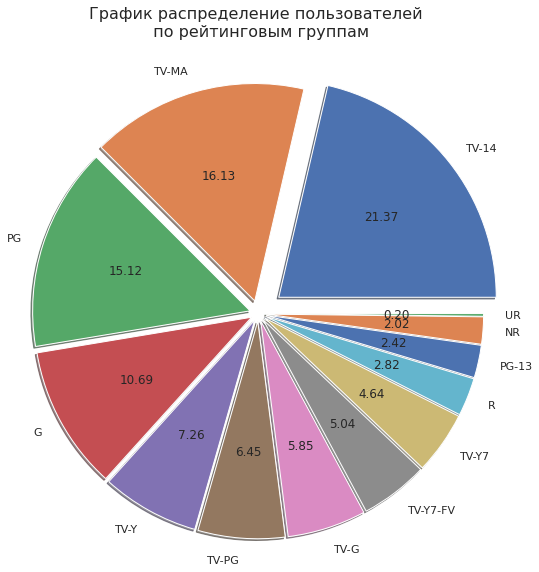

In [ ]:
fig1, ax = plt.subplots()
exp = [.3, .15, .1, .09, .09, .09, .09, .09, .09, .09, .09, .09, .09]

ax.pie(rating_rate, labels=rating_rate.index, autopct='%.2f',
        shadow=True, explode=exp, radius=2.5)

ax.set_title('График распределение пользователей \n по рейтинговым группам', y=1.75, 
             fontdict={'fontsize': 16})

plt.show()

Круговая диаграмма более интерпретируемая чем гистограмма, поскольку отлично виден вклад каждой группы в общую выборку.

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
# Был выбран сериал Сверхъественное

data[data['title'] == 'Supernatural']

,title,rating,ratingLevel,release year,user rating score
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0


In [ ]:
# Найдём среднее значение за тот же год и по тому же рейтингу, 
# за вычетом Сверхъестественного

data[(data['rating'] == 'TV-14') 
& (data['release year'] == 2016) 
& (data['title'] != 'Supernatural')] \
['user rating score'].mean()

83.65714285714286

Оценка пользователями Сверхъестественного выше чем средняя оценка по всем фильмам в той же категории за 2016 год (держим в уме, что это год с большим количеством выпуска фильмов - выброс)

In [ ]:
# Сделаем широкий размах и начнём находить среднюю с 
# "по всем рейтингам за тот же год"

data[(data['release year'] == 2016) 
& (data['title'] != 'Supernatural')] \
['user rating score'].mean()

84.18823529411765

In [ ]:
# "по всем годам с тем же рейтингом"

data[(data['rating'] == 'TV-14')
& (data['title'] != 'Supernatural')] \
['user rating score'].mean()

82.71052631578948

In [ ]:
# "по всему датасету"

data[data['title'] != 'Supernatural']['user rating score'].mean()

81.26482213438736

Оценка нашего сериала больше среднего по всем вышепредставленным выборкам

In [ ]:
# Посмотрим какое место занимает наш сериал с тем же рейтингом и за тот же год

mask = data[(data['rating'] == 'TV-14') 
& (data['release year'] == 2016)
& (data['user rating score'] >= 95)] \
.sort_values('user rating score', ascending=False)

mask.index = range(1, len(mask) + 1)
mask

,title,rating,ratingLevel,release year,user rating score
1,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
2,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Bones,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,97.0
4,NCIS,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,97.0
5,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0
6,The Blacklist,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0
7,Hawaii Five-0,TV-14,"dialogue, language, sexual situations and viol...",2016,96.0
8,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
9,Sherlock,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
10,How to Get Away with Murder,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0


8 место из 11 :)

In [ ]:
mask = data[data['title'] == 'Supernatural']

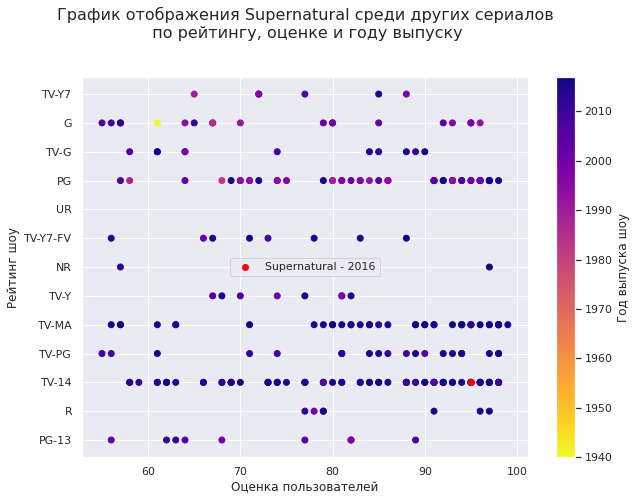

In [ ]:
fig, ax = plt.subplots()

main_graph = ax.scatter(data['user rating score'], data['rating'],
                   c=data['release year'], cmap='plasma_r')

fig.colorbar(main_graph, label='Год выпуска шоу')

ax.scatter(mask['user rating score'], mask['rating'], c='red', 
           label='Supernatural - 2016')
ax.legend()

ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Рейтинг шоу')
ax.set_title('График отображения Supernatural среди других сериалов\n \
по рейтингу, оценке и году выпуску', y=1.1, pad=1, fontdict={'fontsize': 16})

fig.set_size_inches(10, 7)